###  Business Undestanding





Project Objective: Predict whether a client accepted the campaign offer (yes or no) following a phone-based marketing call.
Key Questions:

Which factors most strongly influence a client's decision to accept the campaign offer?
Which classifier will best predict client acceptance of the campaign?

Project Success Criteria: Success is measured by developing an accurate model that identifies clients more likely to accept the offer, enabling effective comparison of classifiers

### Data Understanding

The dataset, loaded from bank-full.csv, contains information from a Portuguese banking institution's marketing campaigns, aiming to predict whether clients will accept a campaign (y variable). The dataset includes three main types of variables: numeric (e.g., age, balance, duration), categorical (e.g., job, marital status, education), and binary (e.g., default, housing, loan). Numeric variables capture continuous metrics related to clients and campaign interactions, while categorical variables describe client demographics and campaign contexts, and binary variables reflect yes/no responses, including the target outcome. This setup provides a comprehensive basis for understanding patterns in client acceptance of marketing offers.

In [1]:

import pandas as pd

# Load the CSV file
file_path = 'data/bank-full.csv'
data = pd.read_csv(file_path, delimiter=";")

# Define types of variables based on the description
numeric_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_vars = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_vars = ['default', 'housing', 'loan', 'y']

# Count non-null values for each column
non_null_counts = data.count()

# Check for any null values
null_counts = data.isnull().sum()

# Count unique values for each column
unique_counts = data.nunique()

# Expected unique values for each categorical variable based on the provided description
expected_values = {
    'job': ["admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", 
            "student", "blue-collar", "self-employed", "retired", "technician", "services"],
    'marital': ["married", "divorced", "single"],
    'education': ["unknown", "secondary", "primary", "tertiary"],
    'default': ["yes", "no"],
    'housing': ["yes", "no"],
    'loan': ["yes", "no"],
    'contact': ["unknown", "telephone", "cellular"],
    'month': ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    'poutcome': ["unknown", "other", "failure", "success"],
    'y': ["yes", "no"]
}

# Check if actual unique values match expected values for categorical and binary columns
unexpected_values = {}
for col, expected in expected_values.items():
    actual_values = data[col].unique()
    unexpected = set(actual_values) - set(expected)
    if unexpected:
        unexpected_values[col] = unexpected

# Create a summary table with non-null, null counts, unique value counts, and any unexpected values
summary = pd.DataFrame({
    'Non-Null Count': non_null_counts,
    'Null Count': null_counts,
    'Unique Values Count': unique_counts
})

print("Summary of data:")
print(summary)

if unexpected_values:
    print("\nUnexpected values found in categorical variables:")
    for col, values in unexpected_values.items():
        print(f"{col}: {values}")
else:
    print("\nAll categorical variables contain only expected values.")

# Display the first 40 values for each variable, categorized by type
print("\nFirst 40 values of each variable:")

# Numeric variables
print("\nNumeric Variables:")
for var in numeric_vars:
    print(f"\n{var.capitalize()} (First 40 values):\n{data[var].head(40).values}")

# Categorical variables
print("\nCategorical Variables:")
for var in categorical_vars:
    unique_vals = data[var].unique()
    print(f"\n{var.capitalize()} (Unique values: {unique_vals})\nFirst 40 values:\n{data[var].head(40).values}")

# Binary variables
print("\nBinary Variables:")
for var in binary_vars:
    unique_vals = data[var].unique()
    print(f"\n{var.capitalize()} (Binary values: {unique_vals})\nFirst 40 values:\n{data[var].head(40).values}")


Summary of data:
           Non-Null Count  Null Count  Unique Values Count
age                 45211           0                   77
job                 45211           0                   12
marital             45211           0                    3
education           45211           0                    4
default             45211           0                    2
balance             45211           0                 7168
housing             45211           0                    2
loan                45211           0                    2
contact             45211           0                    3
day                 45211           0                   31
month               45211           0                   12
duration            45211           0                 1573
campaign            45211           0                   48
pdays               45211           0                  559
previous            45211           0                   41
poutcome            45211           0  

### Data Preparation

The data preparation phase for this dataset does not require extensive transformations, as the dataset appears well-structured and comprehensive. The continuous variables display reasonable distributions, while categorical and binary variables are already clearly defined. Basic steps like encoding categorical variables, normalizing continuous features for certain models, and handling any potential class imbalance should suffice. Given the dataset's quality, minimal adjustments will prepare it effectively for modeling, allowing us to focus more on feature selection and model evaluation.








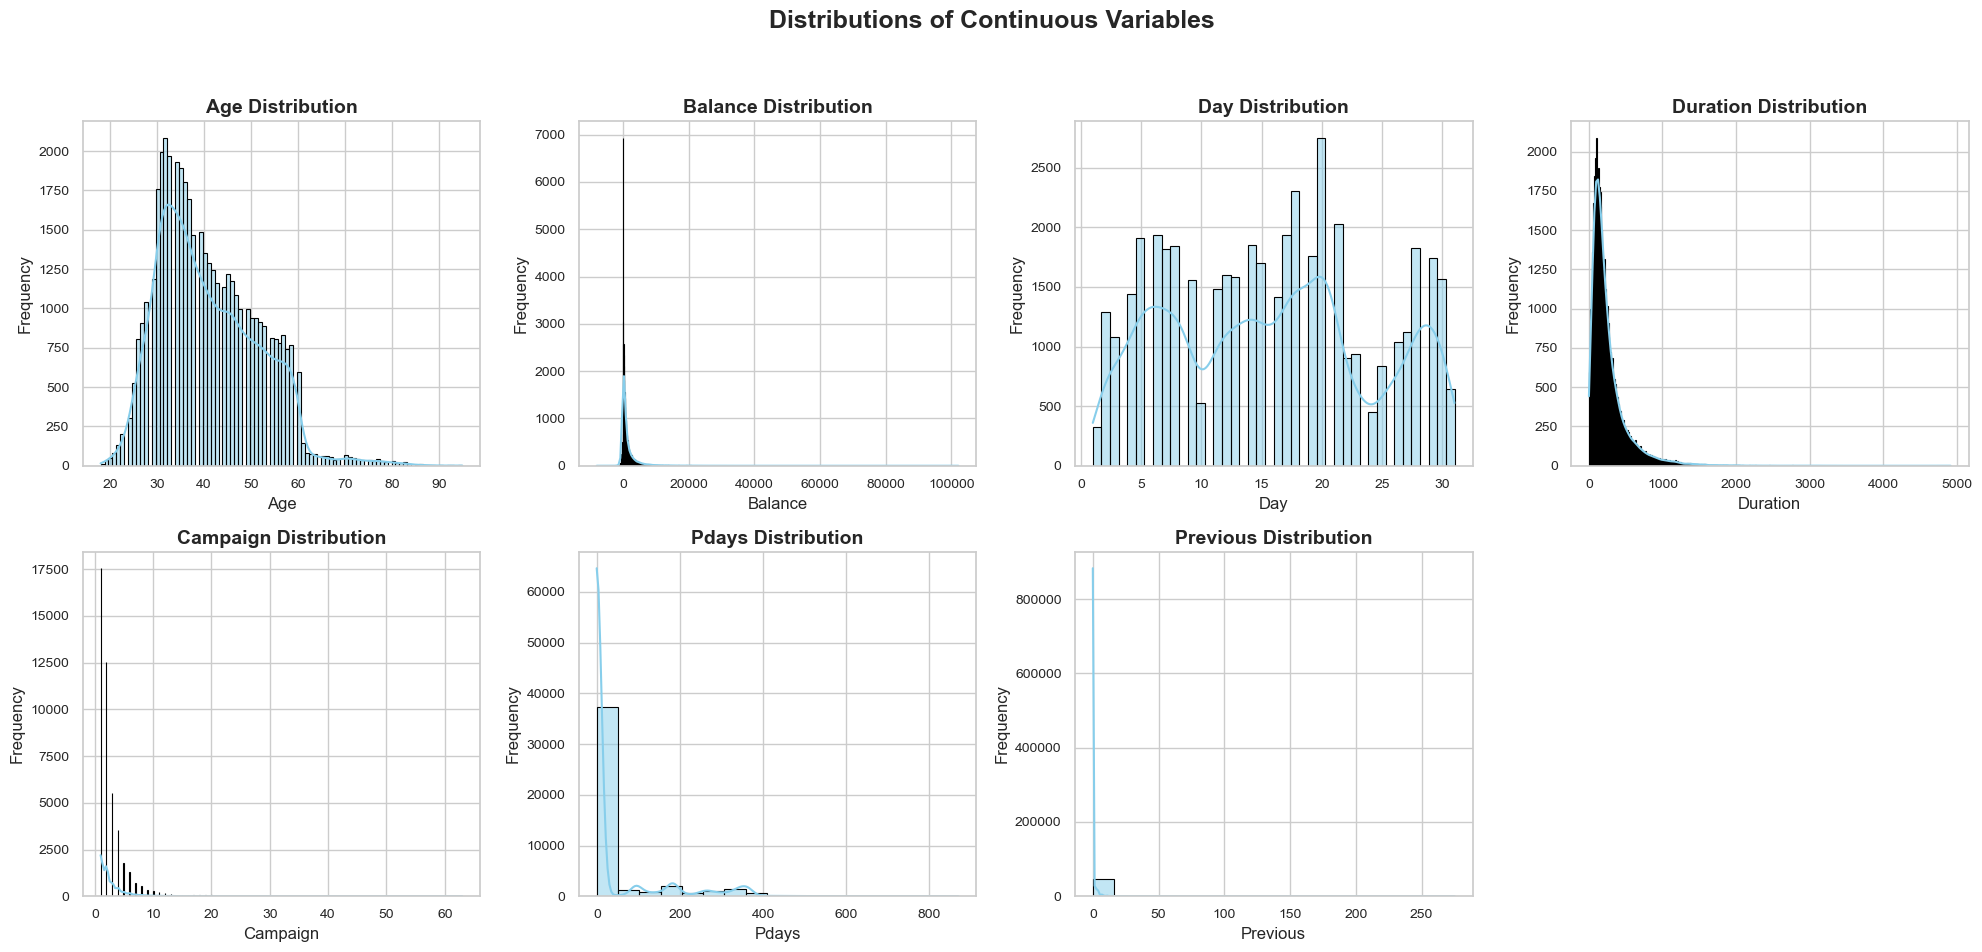

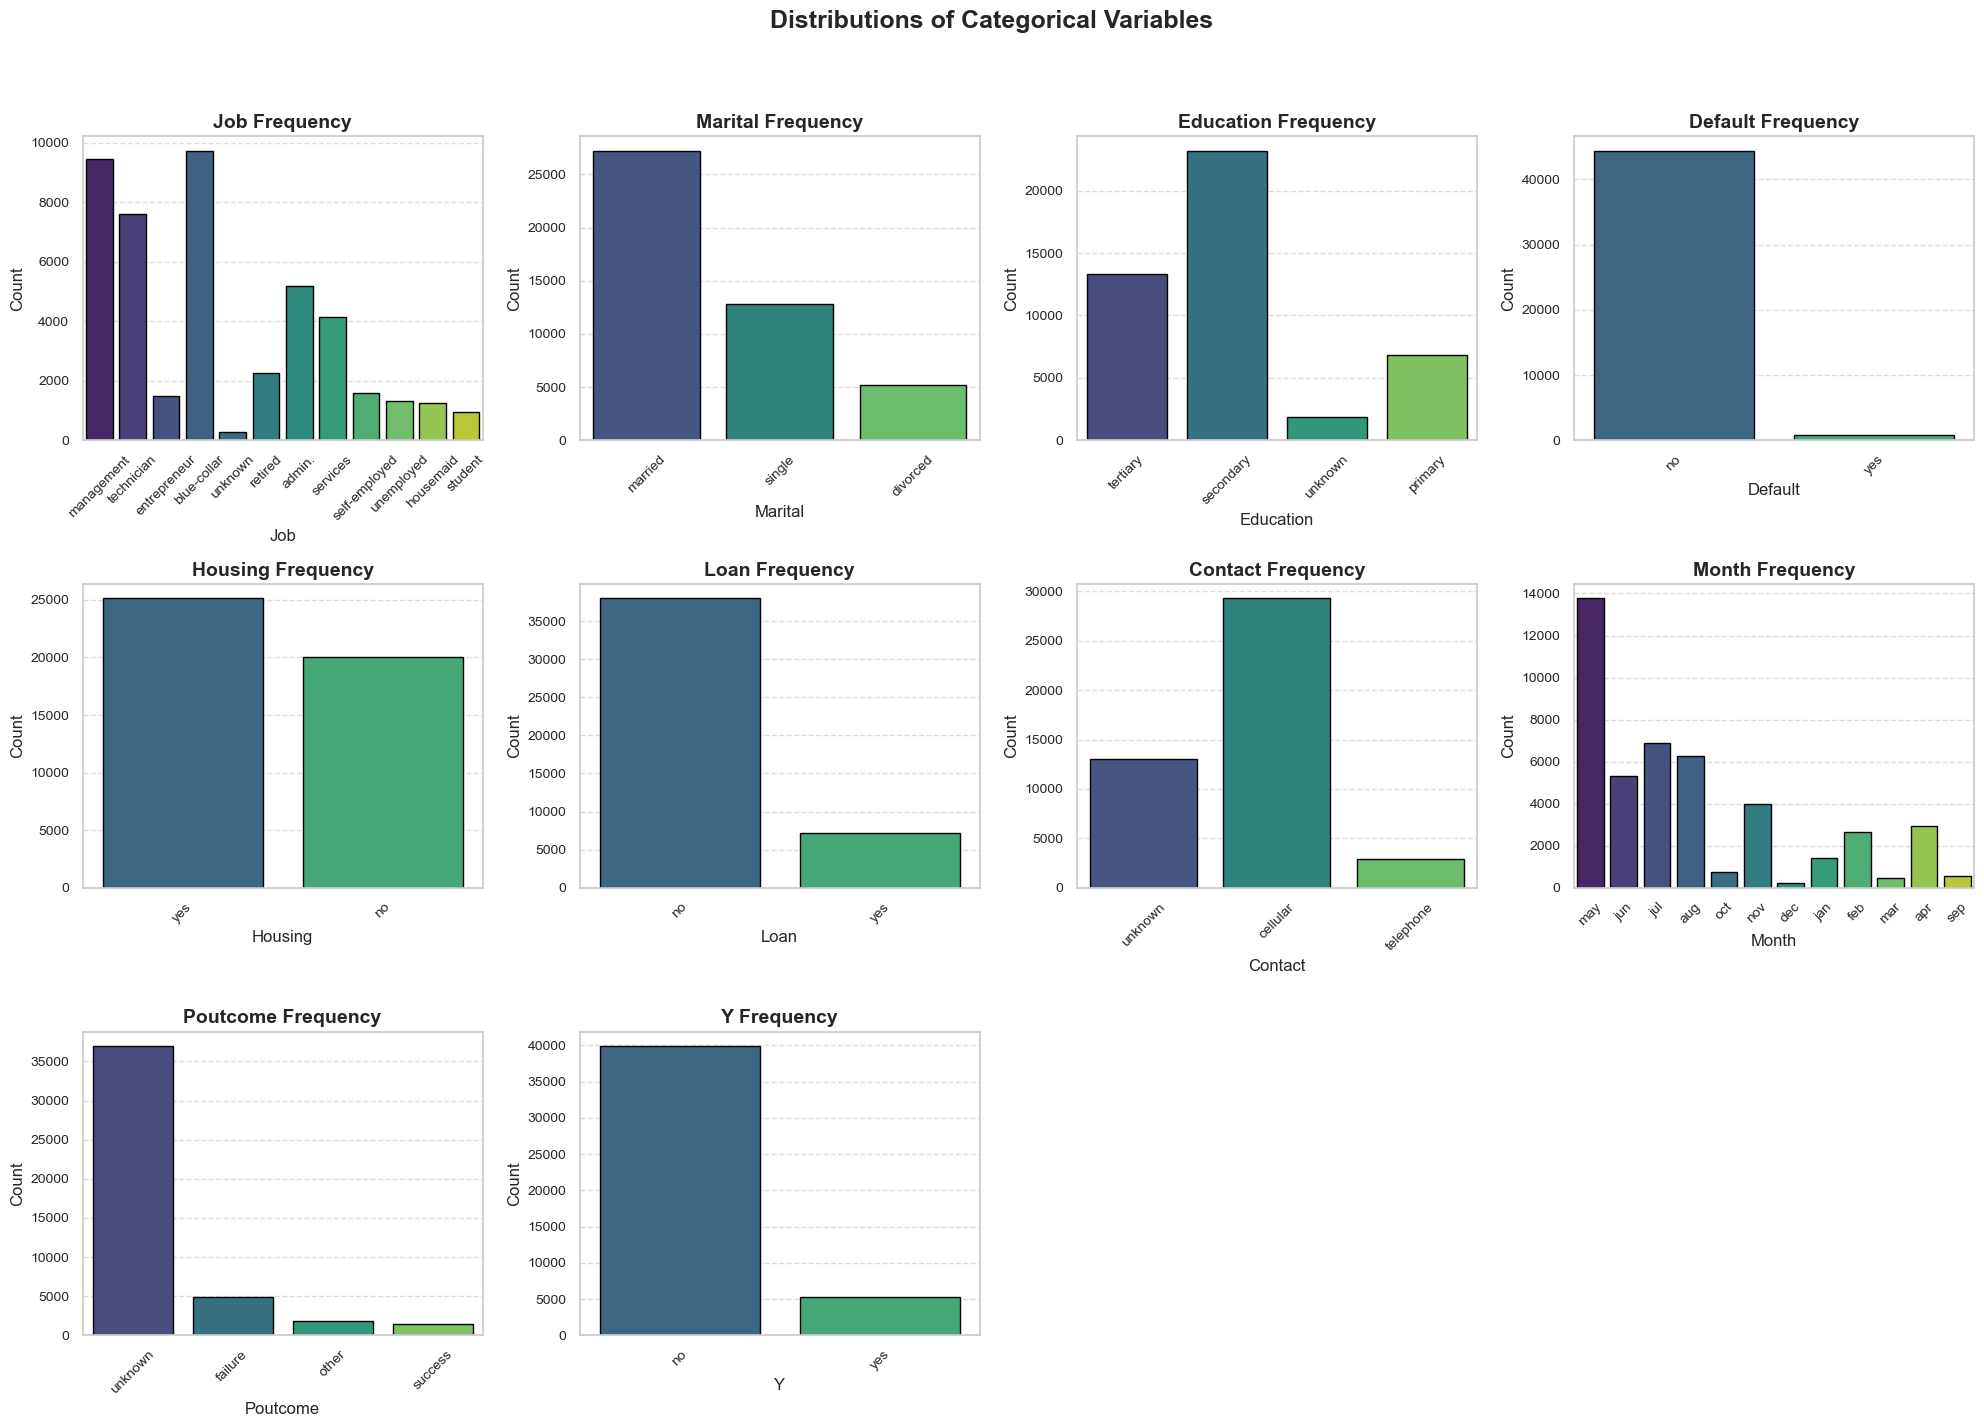

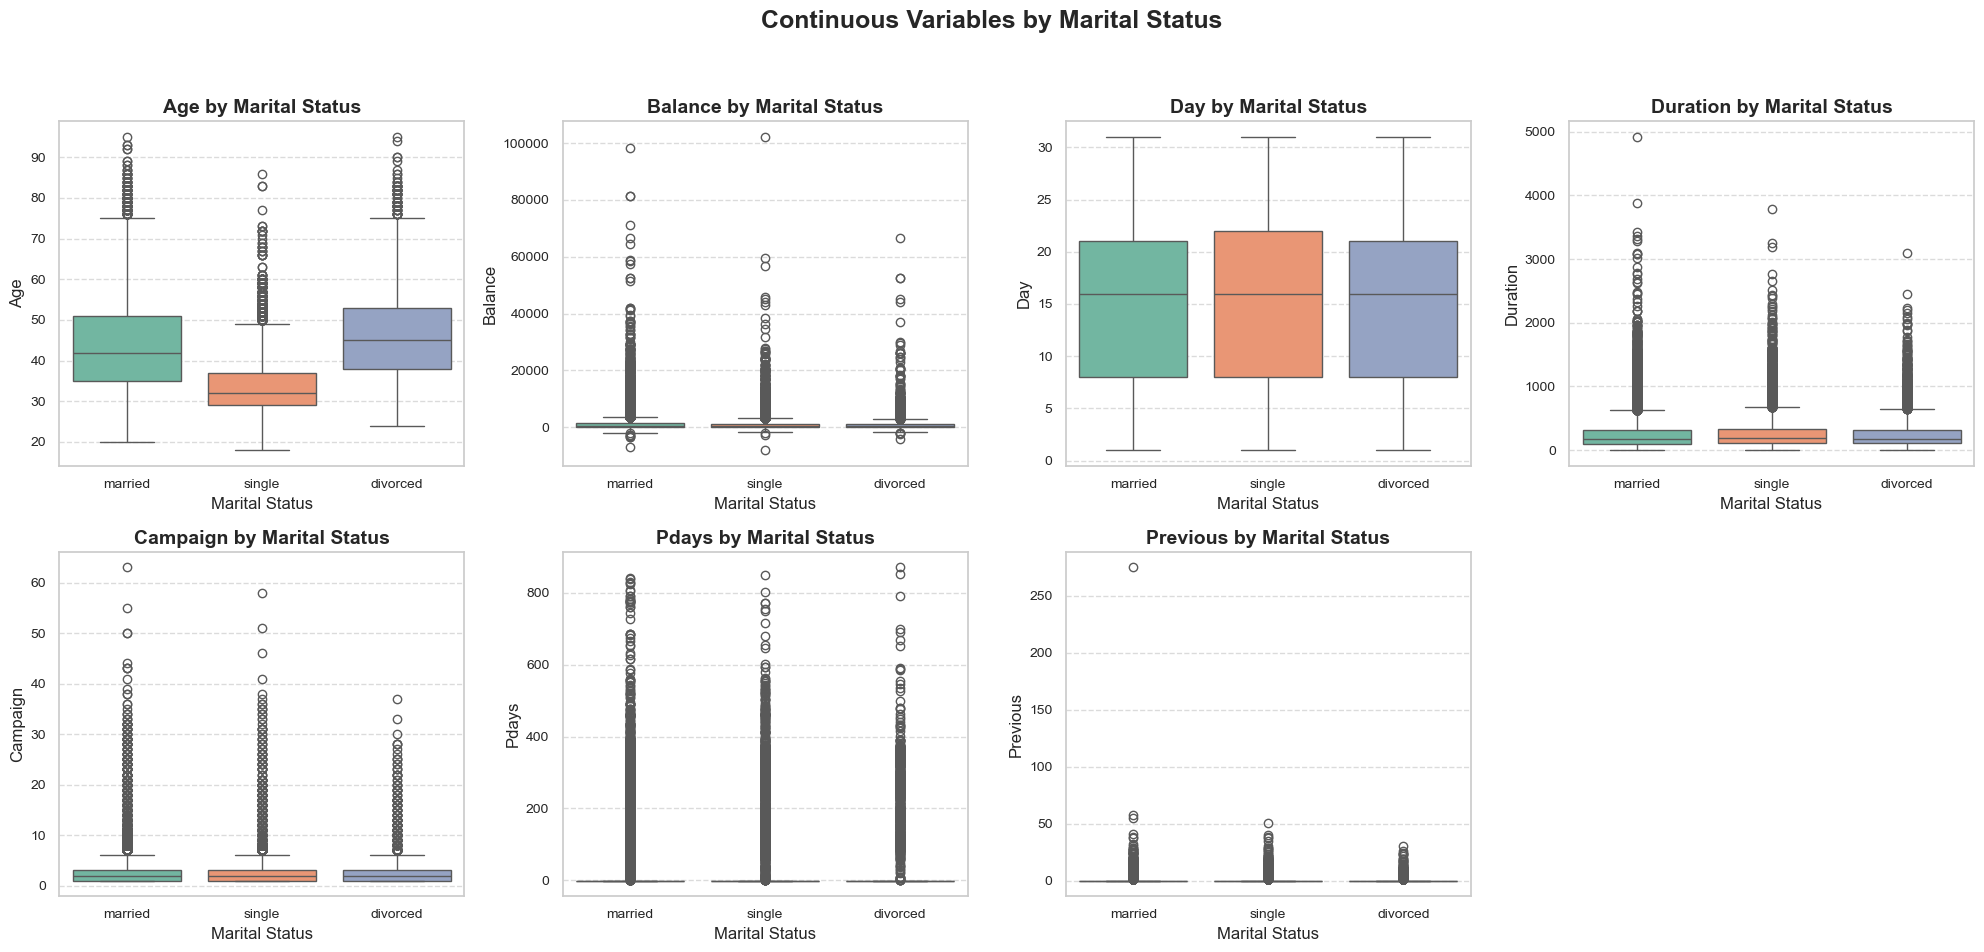

In [2]:

import warnings

# Ignorar advertencias de tipo FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'data/bank-full.csv'
data = pd.read_csv(file_path, delimiter=";")

# Set up the style for plots
sns.set(style="whitegrid", palette="pastel")
plt.rcParams.update({
    'axes.titlesize': 'large', 
    'axes.labelsize': 'medium', 
    'xtick.labelsize': 'small', 
    'ytick.labelsize': 'small',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# Lists of categorical and continuous variables based on variable description
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
continuous_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# 1. Histograms for each continuous variable
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle("Distributions of Continuous Variables", fontsize=18, weight='bold')
for i, var in enumerate(continuous_vars):
    row, col = divmod(i, 4)
    sns.histplot(data[var], kde=True, ax=axs[row, col], color="skyblue", edgecolor="black", linewidth=0.8)
    axs[row, col].set_title(f'{var.capitalize()} Distribution', fontsize=14)
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].grid(True)

# Hide any unused subplots in the grid
for j in range(len(continuous_vars), 8):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Bar plots for each categorical variable
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle("Distributions of Categorical Variables", fontsize=18, weight='bold')
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 4)
    sns.countplot(data=data, x=var, ax=axs[row, col], palette="viridis", edgecolor="black")
    axs[row, col].set_title(f'{var.capitalize()} Frequency', fontsize=14)
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].grid(True, axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots in the grid
for j in range(len(categorical_vars), 12):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Boxplots for continuous variables grouped by categorical variable 'marital'
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle("Continuous Variables by Marital Status", fontsize=18, weight='bold')
for i, var in enumerate(continuous_vars):
    row, col = divmod(i, 4)
    sns.boxplot(data=data, x='marital', y=var, ax=axs[row, col], palette="Set2")
    axs[row, col].set_title(f'{var.capitalize()} by Marital Status', fontsize=14)
    axs[row, col].set_xlabel('Marital Status')
    axs[row, col].set_ylabel(var.capitalize())
    axs[row, col].grid(True, axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots in the grid
for j in range(len(continuous_vars), 8):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Modeling


In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the CSV file
file_path = 'data/bank-full.csv'
data = pd.read_csv(file_path, delimiter=";")

# Encode binary and categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features and target variable
X = data.drop(columns="y_yes")  # Assuming "y_yes" is the encoded target variable
y = data["y_yes"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for kNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "SVM": SVC(random_state=42, probability=True)
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit and predict
    if model_name in ["kNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store performance
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

# Display model performance in a DataFrame for comparison
performance_df = pd.DataFrame(model_performance).T
print("Model Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
kNN                  0.894721   0.594027  0.336045  0.429257  0.817733
Decision Tree        0.872014   0.457460  0.464330  0.460870  0.695394
Logistic Regression  0.899882   0.638889  0.345432  0.448416  0.904699
SVM                  0.905264   0.692972  0.351690  0.466584  0.906527


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
kNN                  0.894721   0.594027  0.336045  0.429257  0.817733   
Decision Tree        0.872014   0.457460  0.464330  0.460870  0.695394   
Logistic Regression  0.899882   0.638889  0.345432  0.448416  0.904699   
SVM                  0.905264   0.692972  0.351690  0.466584  0.906527   

                       Time (s)  
kNN                   18.311264  
Decision Tree          0.437598  
Logistic Regression   12.097257  
SVM                  276.707869  


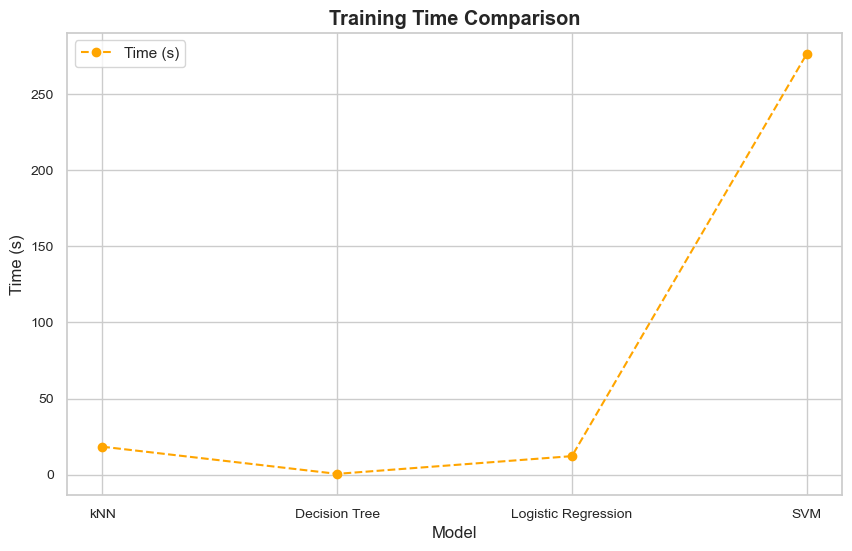

In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import time

# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the CSV file
file_path = 'data/bank-full.csv'
data = pd.read_csv(file_path, delimiter=";")

# Encode binary and categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features and target variable
X = data.drop(columns="y_yes")  # Assuming "y_yes" is the encoded target variable
y = data["y_yes"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for kNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "SVM": SVC(random_state=42, probability=True)
}

# Dictionary to store model performance
model_performance = {}

# Lists to store time and accuracy for plotting
times = []
accuracies = []

# Train and evaluate each model, capturing time and accuracy
for model_name, model in models.items():
    # Measure start time
    start_time = time.time()
    
    # Fit and predict
    if model_name in ["kNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    # Measure end time
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store performance
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Time (s)": elapsed_time
    }

# Display model performance in a DataFrame for comparison
performance_df = pd.DataFrame(model_performance).T
print("Model Performance Comparison:")
print(performance_df)

# Plot Time
plt.figure(figsize=(10, 6))
plt.plot(performance_df.index, times, color="orange", marker="o", linestyle="--", label="Time (s)")
plt.title("Training Time Comparison")
plt.xlabel("Model")
plt.ylabel("Time (s)")
plt.legend()
plt.show()


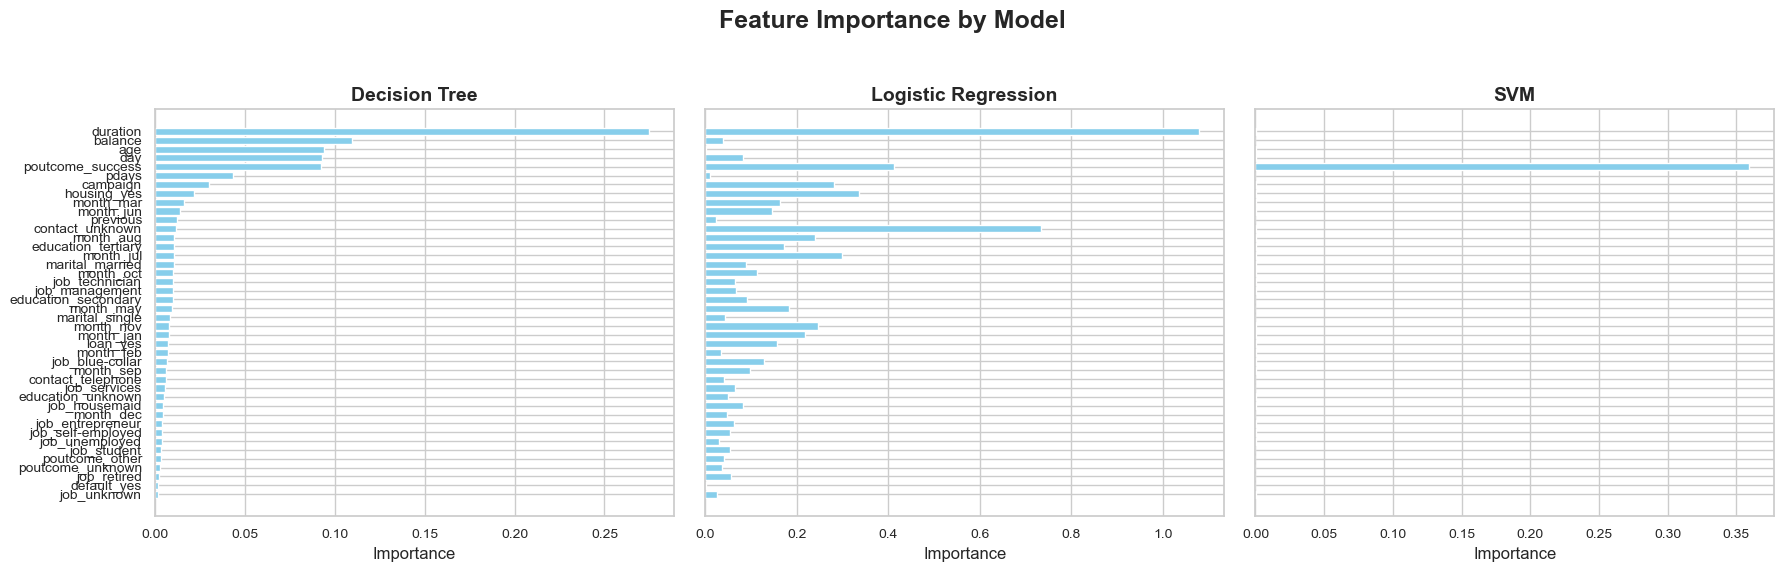

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Update SVM model to use a linear kernel
models["SVM"] = SVC(kernel="linear", random_state=42, probability=True)

# Re-train each model to get feature importance or coefficients
feature_importance = {}

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train models and extract feature importance or coefficients
for model_name, model in models.items():
    if model_name == "kNN":
        # kNN does not provide feature importances, so we skip it here
        continue
    elif model_name == "Decision Tree":
        model.fit(X, y)
        feature_importance[model_name] = model.feature_importances_
    elif model_name == "Logistic Regression":
        model.fit(X_scaled, y)
        feature_importance[model_name] = np.abs(model.coef_[0])
    elif model_name == "SVM":
        model.fit(X_scaled, y)
        feature_importance[model_name] = np.abs(model.coef_[0])

# Get feature names
feature_names = X.columns

# Plot feature importance for each model
fig, axs = plt.subplots(1, len(feature_importance), figsize=(18, 6), sharey=True)
fig.suptitle("Feature Importance by Model", fontsize=18, weight='bold')

for i, (model_name, importance) in enumerate(feature_importance.items()):
    # Sort feature importance for better readability
    sorted_idx = np.argsort(importance)[::-1]
    sorted_feature_names = feature_names[sorted_idx]
    sorted_importance = importance[sorted_idx]
    
    # Plot
    axs[i].barh(sorted_feature_names, sorted_importance, color='skyblue')
    axs[i].set_title(f"{model_name}", fontsize=14, weight='bold')
    axs[i].set_xlabel("Importance")
    axs[i].invert_yaxis()  # Highest importance at the top

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Evaluation



The evaluation of the models highlights clear distinctions in both training time and feature importance. SVM has the longest training time at 276 seconds, significantly higher than Decision Tree (0.4 seconds) and Logistic Regression (12 seconds). Despite this increased computational cost, SVM achieved the highest accuracy and ROC-AUC scores, indicating its strong predictive performance. Both Logistic Regression and SVM models show high ROC-AUC values, making them suitable choices for tasks where prediction accuracy is prioritized over model training speed.

Feature importance analysis across the models reveals that duration is the most influential variable, particularly in Decision Tree and Logistic Regression. This suggests that the length of the last contact with a client has a strong positive correlation with the likelihood of campaign acceptance, indicating that clients engaged in longer conversations are more receptive to the offer. Other important features in some models include poutcome (the outcome of previous campaigns) and contact (the type of communication), emphasizing the impact of previous positive interactions and preferred communication methods on client responses.

In the Decision Tree model, the top predictors are duration, balance, and age. The importance of duration underscores the value of investing time in client conversations, as longer calls may increase the probability of acceptance. Financial indicators like balance are also highly ranked, suggesting that clients with higher account balances may be more open to financial offers. The variable age highlights certain demographic segments that may be more inclined toward campaign acceptance, offering insights for targeted demographic strategies.

For Logistic Regression, duration is once again the most dominant feature, reinforcing its significance across algorithms. Other influential variables in this model include poutcome_success (indicating a successful outcome in previous campaigns), contact_cellular (type of contact), and campaign (number of contacts during the current campaign). This combination suggests that clients who had positive prior interactions, who were reached through mobile phones, and who were contacted multiple times are more likely to accept the offer. In the SVM model, though feature importance is less interpretable, duration remains a key predictor, reinforcing its importance across models. Overall, variables such as call duration, account balance, past campaign outcomes, contact method, and age consistently emerge as influential, underscoring their critical role in predicting client responses to marketing campaigns.
















### Deployment


Findings
Our analysis identified the most effective predictive models and key factors that influence client acceptance of marketing campaigns. The Support Vector Machine (SVM) model demonstrated the highest predictive accuracy (90.5%) and reliability, with the best ROC-AUC score (0.906). However, due to its long training time (277 seconds), it may be best suited for periodic, batch predictions rather than real-time use. Alternatively, Logistic Regression achieved nearly the same accuracy (89.9%) but with a much faster training time (12 seconds), making it ideal for more immediate applications. Both models effectively identify clients likely to respond positively to campaign offers.

Key Acceptance Factors:

Duration of Call: The length of the call was consistently the strongest predictor across all models. Longer conversations are associated with a higher likelihood of client acceptance.
Past Campaign Success: Clients who responded positively in previous campaigns are more likely to do so again. This highlights the value of targeting clients with successful prior interactions.
Contact Method: Contacting clients via mobile phones rather than landlines improves response rates.
Financial Indicators: Higher account balances and clients within certain age ranges also show a greater probability of accepting offers.
Next Steps and Recommendations
Leverage Logistic Regression for Real-Time Targeting: Given its high accuracy and short training time, Logistic Regression is recommended for deployment in real-time marketing systems. This model can quickly identify high-potential clients, making it effective for time-sensitive campaigns.

Use SVM for High-Accuracy Batch Predictions: For periodic, high-accuracy predictions, SVM is a strong choice, particularly in cases where model runtime is less of a concern. This model can help refine client lists for monthly or quarterly outreach campaigns.

Focus Campaign Efforts on Key Factors: The marketing team should prioritize clients who had positive responses in prior campaigns, target calls to mobile phones, and aim for longer, quality conversations to improve engagement rates.

Regular Model Updates: To maintain accuracy, retrain the models regularly with updated client data. This will ensure the models stay aligned with current client behaviors and preferences.

By following these steps, the bank can maximize campaign effectiveness, better target high-potential clients, and continually refine its outreach strategy based on data-driven insights.